In [1]:
#type this into the commandline (make sure you're in the right directory)
#mongoexport --db venmo --collection venmo --type=csv --out notes.csv --fields _id,note
import numpy as np
import pandas as pd
import gensim 
import string
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
from gensim.models import Word2Vec
from collections import Counter

In [2]:
df = pd.read_csv("notes.csv")

In [3]:
df = df.dropna()

In [4]:
#break the df into chunks
n = 250000  #chunk row size
df_list = [df[i:i+n] for i in range(0,df.shape[0],n)]
df_list[0] #currently I'm going to work on one chunk only

,_id,note
0,ObjectId(5bb7bd386e52181f090becfa),fuk ya
1,ObjectId(5bb7bd386e52181f090becfb),🚗
2,ObjectId(5bb7bd386e52181f090becfc),:venmo_dollar:
3,ObjectId(5bb7bd386e52181f090becfd),Gatorade
4,ObjectId(5bb7bd386e52181f090becfe),🎉
...,...,...
250000,ObjectId(5bb7bed11bed297da90100b4),Letting me try on 7 pairs 😎
250001,ObjectId(5bb7bed11bed297da90100b5),Fight night 🥊
250002,ObjectId(5bb7bed11bed297da90100b6),Big nonsense
250003,ObjectId(5bb7bed11bed297da90100b7),Food


In [8]:
corpus = []
for index, row in df_list[0].iterrows():
    note = [word.lower() for word in row["note"].split()]
    corpus.append(note)

In [9]:
model = Word2Vec(corpus, size=100, window=5, min_count=1, workers=4)

In [11]:
#extract feature vector from notes
feature_list = []
for index, row in df_list[0].iterrows():
    note = [word.lower() for word in row["note"].split()]
    for word in note:
        feature = []
        feature.append(model.wv[word])
    feature_list.append(np.average(feature,axis=0))

In [12]:
#split the notes into 10 clusters (still not sure of optimal cluster count)
kmeans = KMeans(n_clusters=10)
kmeans.fit(feature_list)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
Counter(kmeans.labels_)

Counter({9: 3210,
         5: 9346,
         6: 34192,
         0: 127509,
         1: 47637,
         2: 18377,
         4: 5576,
         3: 888,
         7: 1705,
         8: 1560})

In [14]:
pd.options.mode.chained_assignment = None
df_list[0]["label"] = kmeans.labels_

In [15]:
df_list[0]

,_id,note,label
0,ObjectId(5bb7bd386e52181f090becfa),fuk ya,9
1,ObjectId(5bb7bd386e52181f090becfb),🚗,5
2,ObjectId(5bb7bd386e52181f090becfc),:venmo_dollar:,6
3,ObjectId(5bb7bd386e52181f090becfd),Gatorade,0
4,ObjectId(5bb7bd386e52181f090becfe),🎉,6
...,...,...,...
250000,ObjectId(5bb7bed11bed297da90100b4),Letting me try on 7 pairs 😎,6
250001,ObjectId(5bb7bed11bed297da90100b5),Fight night 🥊,0
250002,ObjectId(5bb7bed11bed297da90100b6),Big nonsense,0
250003,ObjectId(5bb7bed11bed297da90100b7),Food,2


In [31]:
#this function generates a wordcloud based on the cluster number you give it (0,1,2,etc.)
#it uses Symbola font currently
def create_cluster_cloud(cluster_num):
    # the regex used to detect words is a combination of normal words, ascii art, and emojis
    # 2+ consecutive letters (also include apostrophes), e.x It's
    normal_word = r"(?:\w[\w']+)"
    # 2+ consecutive punctuations, e.x. :)
    ascii_art = r"(?:[{punctuation}][{punctuation}]+)".format(punctuation=string.punctuation)
    # a single character that is not alpha_numeric or other ascii printable
    emoji = r"(?:[^\s])(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
    regexp = r"{normal_word}|{ascii_art}|{emoji}".format(normal_word=normal_word, ascii_art=ascii_art, emoji=emoji)
    stopwords = set(STOPWORDS)
    cluster = ' '
    for index, row in df_list[0].iterrows():
        if row["label"] == cluster_num:
            note = note = [word.lower() for word in row["note"].split()]
            for word in note:
                cluster = cluster + word + ' '
    wordcloud = WordCloud(font_path = "Symbola.ttf", width=1000, height=1000, stopwords = stopwords, regexp = regexp).generate(cluster)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show() 

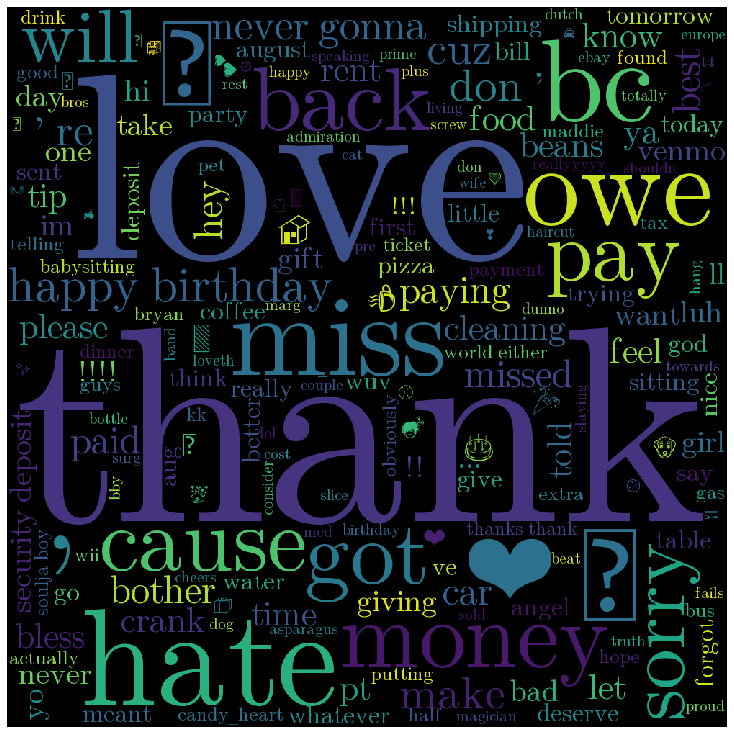

In [24]:
#cluster 3
create_cluster_cloud(3)

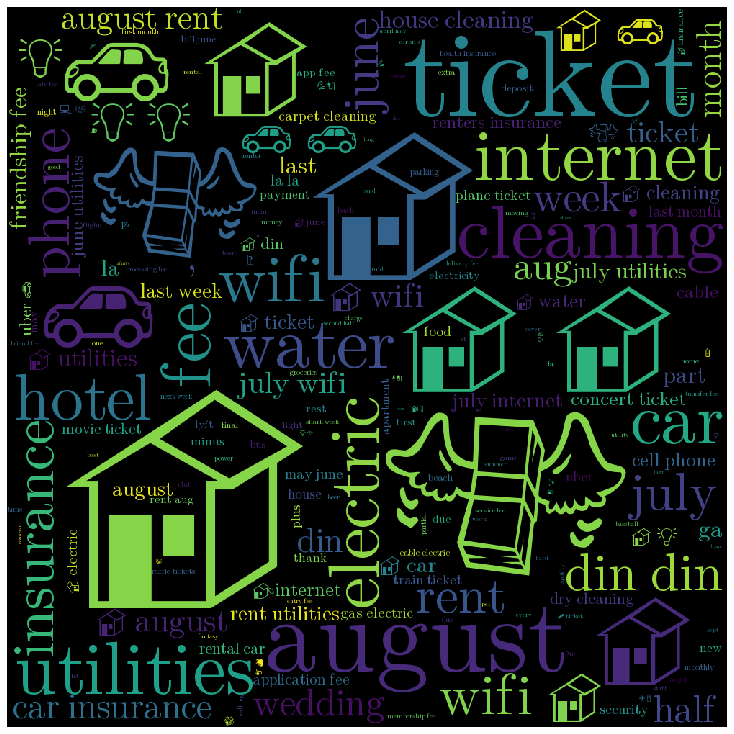

In [23]:
#cluster 5
create_cluster_cloud(5)

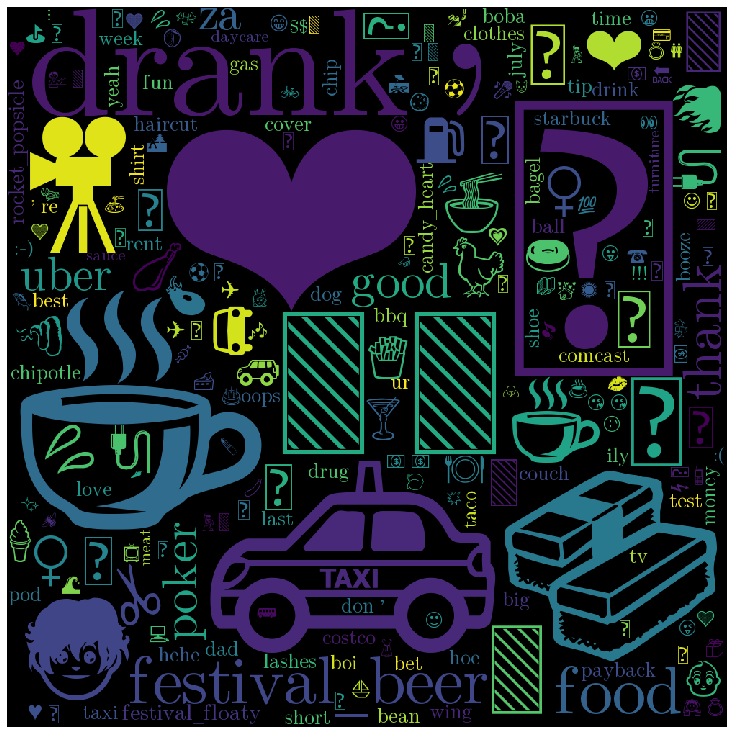

In [32]:
#cluster 1
create_cluster_cloud(1)